## Inisialisasi

In [7]:
# Muat semua library
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Memuat Data

In [8]:
# Muat file data ke dalam DataFrame yang berbeda
df_calls = pd.read_csv('datasets/megaline_calls.csv', parse_dates=['call_date'])
df_internet = pd.read_csv('datasets/megaline_internet.csv', parse_dates=['session_date'])
df_message = pd.read_csv('datasets/megaline_messages.csv', parse_dates=['message_date'])
df_plans = pd.read_csv('datasets/megaline_plans.csv')
df_users = pd.read_csv('datasets/megaline_users.csv', parse_dates=['reg_date', 'churn_date'])

## Paket Prabayar

In [9]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [10]:
df_calls.sample(10)

,id,user_id,call_date,duration
30775,1114_825,1114,2018-12-05,12.87
111223,1390_672,1390,2018-05-19,0.00
67998,1246_17,1246,2018-04-09,17.38
77458,1277_534,1277,2018-10-27,0.45
41829,1153_673,1153,2018-07-18,4.72
18408,1071_188,1071,2018-12-05,8.31
13940,1059_161,1059,2018-10-18,18.61
89829,1326_480,1326,2018-11-25,7.62
56831,1203_222,1203,2018-10-15,12.47
90246,1327_171,1327,2018-12-27,0.66


kolom `call_date` dapat diganti menggunakan tipe `date_time`

In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [12]:
df_internet.sample(10)

,id,user_id,session_date,mb_used
927,1005_41,1005,2018-12-27,214.95
101872,1488_272,1488,2018-11-22,358.43
51227,1231_156,1231,2018-08-04,277.80
100170,1474_499,1474,2018-09-01,747.90
10735,1054_270,1054,2018-10-23,174.21
34968,1157_55,1157,2018-11-13,72.79
75440,1355_64,1355,2018-12-26,441.85
48802,1217_142,1217,2018-10-07,100.29
44592,1197_62,1197,2018-12-23,417.46
92274,1430_47,1430,2018-12-12,266.09


In [13]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
df_message.sample(10)

,id,user_id,message_date
72607,1470_235,1470,2018-12-02
10908,1077_179,1077,2018-06-05
37464,1248_28,1248,2018-12-30
61390,1384_508,1384,2018-08-05
64057,1408_182,1408,2018-08-17
69685,1454_47,1454,2018-08-01
55974,1354_145,1354,2018-09-17
2422,1028_334,1028,2018-02-28
33399,1211_75,1211,2018-07-24
46366,1316_210,1316,2018-09-21


In [15]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [16]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dataframe untuk `plans` tidak diperlukan pembersihan

In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [18]:
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaT
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,NaT
258,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,NaT
271,1271,Darrin,Rose,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-24,surf,NaT
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaT
229,1229,Augustus,Barker,69,"Austin-Round Rock-Georgetown, TX MSA",2018-12-09,ultimate,NaT
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaT
210,1210,Shanae,Carrillo,30,"Oklahoma City, OK MSA",2018-06-01,surf,NaT
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,NaT
288,1288,Jenette,Rush,60,"Las Vegas-Henderson-Paradise, NV MSA",2018-07-18,surf,NaT


**Kesimpulan**

Data yang sama disetiap tabel ialah data `user_id`. Dapat digunakan untuk dibandingkan satu tabel dengan yang lainnya. Untuk tabel `plans` hanya berisi deskripsi dari `plan` yang digunakan oleh `user`.

## Memperbaiki Data

Mencari duplikat data

In [19]:
# Memperbaiki tipe data yang sesuai dan duplikatnya
def duplikat_data(data,kolom):
    duplikat = data.duplicated().sum()
    return print(f'Terdapat {duplikat} duplikat pada dataframe')

In [20]:
duplikat_data(df_calls,'call_date')

Terdapat 0 duplikat pada dataframe


In [21]:
duplikat_data(df_internet,'session_date')

Terdapat 0 duplikat pada dataframe


In [22]:
duplikat_data(df_message,'message_date')

Terdapat 0 duplikat pada dataframe


In [23]:
duplikat_data(df_users,'reg_date')

Terdapat 0 duplikat pada dataframe


In [24]:
duplikat_data(df_users,'churn_date',)

Terdapat 0 duplikat pada dataframe


Setelah diperbaiki menjadi tanggal, data juga dicari duplikatnya, ternyata dari semua dataframe, tidak ada satupun data yang memiliki duplikat


## Memperkaya Kualitas Data

Data sudah bagus

## Pengguna

In [25]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [26]:
# Tampilkan sampel data pengguna
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
372,1372,Patria,Kim,26,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-08,surf,NaT
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,NaT
475,1475,Arlen,Sutton,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-05-28,ultimate,NaT
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaT
272,1272,Ernest,Mercado,23,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-04,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
472,1472,Maximo,Mendoza,51,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-10,surf,NaT
209,1209,Garret,Paul,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-28,surf,NaT
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,NaT
16,1016,Jann,Salinas,30,"Fresno, CA MSA",2018-10-25,surf,NaT


Terlihat bahwa NaT berarti "Not a Time" atau data yang hilang dalam bentuk tanggal

### Memperbaiki Data

Tidak ada data yang perlu diperbaiki

### Memperkaya Kualitas Data

Data suda bagus

## Panggilan

In [27]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [28]:
# Tampilkan sampel data berisi panggilan
df_calls.sample(10)

,id,user_id,call_date,duration
17692,1068_18,1068,2018-12-04,8.78
126255,1447_120,1447,2018-11-23,0.00
128987,1465_146,1465,2018-09-05,6.59
135245,1491_48,1491,2018-11-13,5.71
43338,1157_367,1157,2018-12-23,0.00
87877,1321_773,1321,2018-09-29,5.33
62114,1223_285,1223,2018-12-16,7.92
40397,1149_85,1149,2018-10-21,0.00
19941,1076_375,1076,2018-10-04,9.41
66486,1240_344,1240,2018-12-14,7.37


In [29]:
df_calls.describe()

,user_id,call_date,duration
count,137735.000000,137735,137735.000000
mean,1247.658046,2018-09-25 19:57:56.319018496,6.745927
min,1000.000000,2018-01-15 00:00:00,0.000000
25%,1128.000000,2018-08-08 00:00:00,1.290000
50%,1247.000000,2018-10-12 00:00:00,5.980000
75%,1365.000000,2018-11-26 00:00:00,10.690000
max,1499.000000,2018-12-31 00:00:00,37.600000
std,139.416268,NaN,5.839241


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

<Axes: >

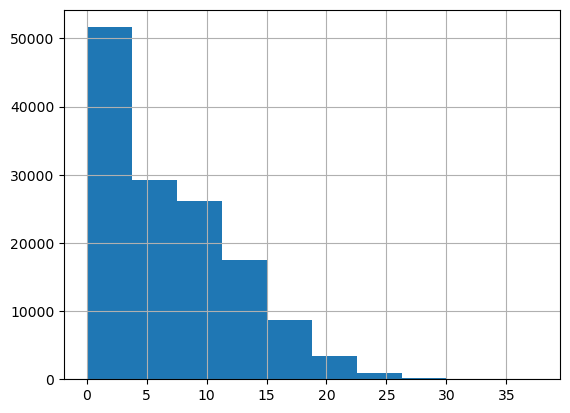

In [30]:
df_calls['duration'].hist(bins=10)

<Axes: >

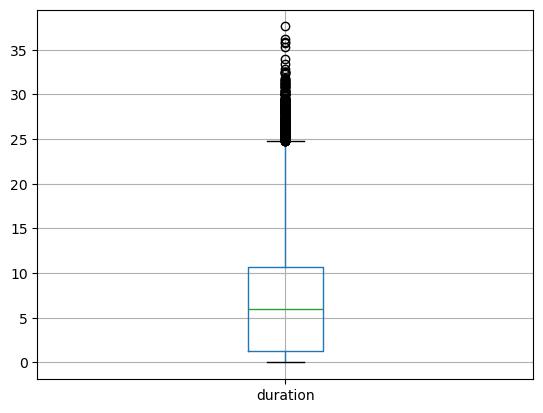

In [31]:
df_calls.boxplot('duration')

Karena belum mengetahui signifikasi dari data outlier, untuk saat ini belum akan dihilangkan

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Belum ada yang harus diperbaiki

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

Kita bedakan setiap bulannya

In [32]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls_monthly = df_calls.groupby(['user_id','month']).agg({'duration':'sum', 'id':'count'}).reset_index()
df_calls_monthly.columns = ['user_id', 'month', 'call_duration', 'call_count']
df_calls_monthly.sample(10)

,user_id,month,call_duration,call_count
110,1030,11,444.80,72
13,1004,8,334.86,49
1479,1328,9,618.82,92
1167,1253,12,130.50,21
242,1056,9,371.95,50
133,1037,12,437.66,67
1553,1343,9,416.63,63
2187,1484,12,365.16,44
865,1185,5,449.36,79
945,1202,10,556.18,83


## Pesan/SMS

In [33]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [34]:
# Tampilkan sampel data untuk SMS
df_message.sample(10)

,id,user_id,message_date
41272,1264_443,1264,2018-10-13
8841,1066_12,1066,2018-04-07
13917,1095_14,1095,2018-10-29
57491,1362_578,1362,2018-02-09
42242,1273_308,1273,2018-11-16
67305,1435_343,1435,2018-10-07
39202,1255_278,1255,2018-12-14
74779,1484_257,1484,2018-12-10
51070,1331_245,1331,2018-09-05
34662,1220_178,1220,2018-12-25


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

<Axes: >

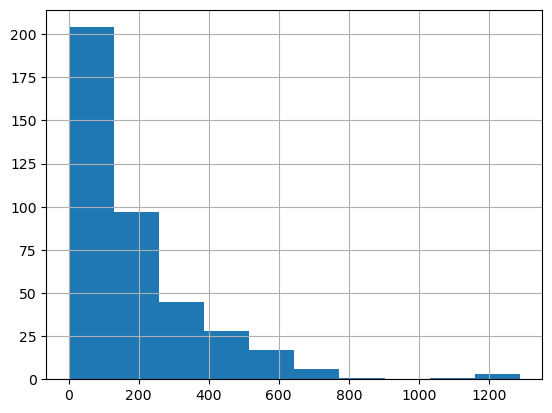

In [35]:
df_message.groupby('user_id')['message_date'].count().hist()

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Tidak ada yang perlu diperbaiki

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

In [36]:
df_message['month'] = df_message['message_date'].dt.month
df_message_monthly = df_message.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
df_message_monthly.columns = ['user_id', 'month','message_count']
df_message_monthly.sample(10)

,user_id,month,message_count
916,1247,7,29
650,1175,12,36
1602,1439,7,59
854,1231,7,1
696,1188,11,49
1638,1447,11,68
137,1047,12,7
81,1030,10,9
1452,1387,10,17
1746,1476,7,30


## Internet

In [37]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [38]:
# Tampilkan sampel data untuk traffic internet
df_internet.sample(10)

,id,user_id,session_date,mb_used
104511,1498_593,1498,2018-02-20,195.23
7230,1041_70,1041,2018-06-14,390.55
51835,1232_424,1232,2018-04-13,0.00
26339,1122_294,1122,2018-05-12,687.58
43011,1191_190,1191,2018-06-19,404.86
15337,1069_258,1069,2018-09-26,256.10
81576,1382_176,1382,2018-10-12,341.80
59484,1268_153,1268,2018-04-07,689.12
11929,1059_28,1059,2018-12-03,174.22
76866,1359_559,1359,2018-09-18,698.70


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

<Axes: >

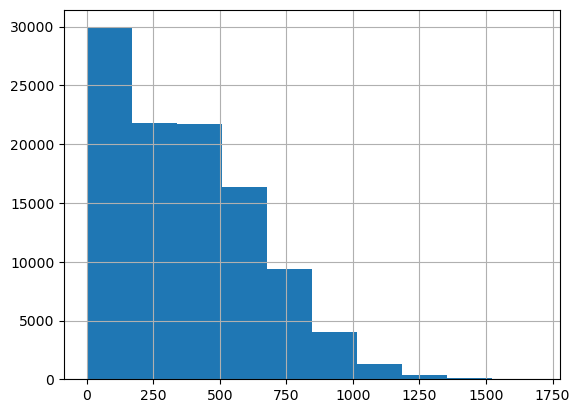

In [39]:
df_internet['mb_used'].hist()

<Axes: >

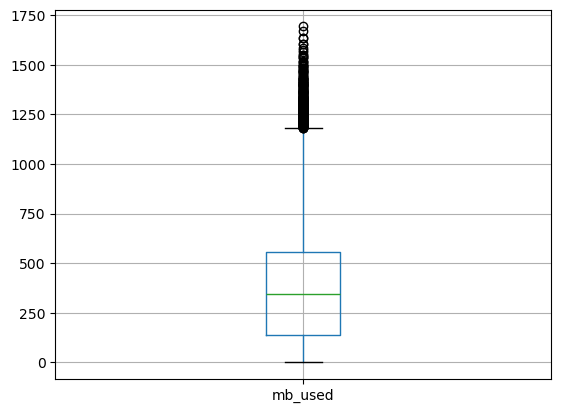

In [40]:
df_internet.boxplot('mb_used')

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Tidak ada yang harus diperbaiki

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

In [41]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet_monthly = df_internet.groupby(['user_id','month']).agg({'id':'count','mb_used':'sum'}).reset_index()
df_internet_monthly.columns = ['user_id', 'month','session_count','mb_sum']
df_internet_monthly.sample(10)

,user_id,month,session_count,mb_sum
1954,1417,12,44,21970.57
1163,1248,11,8,1869.23
322,1069,11,39,11538.48
22,1007,9,52,28123.95
1515,1329,12,52,25859.40
710,1149,11,40,12987.49
1603,1348,11,47,13081.88
314,1068,7,53,14329.65
247,1057,10,56,28474.23
1069,1224,9,54,17173.14


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

[Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kami sarankan Anda menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.]

In [42]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Mengagregasi Data per Pengguna

[Sekarang, karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.]

In [43]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
df_calls_monthly

,user_id,month,call_duration,call_count
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53
2256,1499,11,288.56,45


In [44]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
df_message_monthly

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [45]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
df_internet_monthly

,user_id,month,session_count,mb_sum
0,1000,12,5,1901.47
1,1001,8,25,6919.15
2,1001,9,53,13314.82
3,1001,10,56,22330.49
4,1001,11,51,18504.30
...,...,...,...,...
2272,1498,12,65,23137.69
2273,1499,9,45,12984.76
2274,1499,10,61,19492.43
2275,1499,11,49,16813.83


[Satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu].

In [46]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
df_transisi = df_internet_monthly.merge(df_calls_monthly, on=['user_id','month'], how='outer')
df_gabungan = df_transisi.merge(df_message_monthly, on=['user_id','month'],how='left')
df_gabungan_new = df_gabungan.merge(df_users[['user_id','plan','city']], on='user_id',how='left').sort_values('user_id').reset_index()
len(df_gabungan_new.groupby('user_id'))

490

Terdapat 10 data pengguna yang tidak menggunakan paketnya, maka dari itu dapat kita abaikan

In [47]:
df_gabungan_new.isna().sum()

index              0
user_id            0
month              0
session_count     15
mb_sum            15
call_duration     34
call_count        34
message_count    487
plan               0
city               0
dtype: int64

In [48]:
df_gabungan_new = df_gabungan_new.fillna(0)

In [49]:
df_gabungan_new.isna().sum()

index            0
user_id          0
month            0
session_count    0
mb_sum           0
call_duration    0
call_count       0
message_count    0
plan             0
city             0
dtype: int64

[Hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit! Karena itu, tidak masalah jika Anda membutuhkan lebih banyak waktu untuk mengerjakannya.]

bayar bulanan sesuai paket + extrapay dari telpon sesuai paket + extrapay dari sms sesuai paket + extrapay internet sesuai paket

In [50]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [51]:
df_gabungan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2292 non-null   int64  
 1   user_id        2292 non-null   int64  
 2   month          2292 non-null   int32  
 3   session_count  2292 non-null   float64
 4   mb_sum         2292 non-null   float64
 5   call_duration  2292 non-null   float64
 6   call_count     2292 non-null   float64
 7   message_count  2292 non-null   float64
 8   plan           2292 non-null   object 
 9   city           2292 non-null   object 
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 170.2+ KB


Pertama, buat fungsi untuk cek plan surf

In [52]:
df_gabungan_new['plan'] = df_gabungan_new['plan'].astype('string')
df_gabungan_new['month'] = df_gabungan_new['month'].astype('int')
df_gabungan_new['message_count'] = df_gabungan_new['message_count'].astype('int')
df_gabungan_new['session_count'] = df_gabungan_new['session_count'].astype('int')

In [53]:
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'internet'
def internet_surf(baris):
    hasil = 0
    if df_gabungan_new['mb_sum'][baris] > df_plans['mb_per_month_included'][0]:
        hasil = math.ceil((df_gabungan_new['mb_sum'][baris] - df_plans['mb_per_month_included'][0])/1000)*df_plans['usd_per_gb'][0]
        return hasil
    else:
        return hasil
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'calls'
def calls_surf(baris):
    hasil = 0
    if df_gabungan_new['call_duration'][baris] > df_plans['minutes_included'][0]:
        hasil =  math.ceil(df_gabungan_new['call_duration'][baris] - df_plans['minutes_included'][0])*df_plans['usd_per_minute'][0]
        return hasil
    else:
        return hasil
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'messages'  
def messages_surf(baris):
    hasil = 0
    if df_gabungan_new['message_count'][baris] > df_plans['messages_included'][0]:
        hasil = (df_gabungan_new['message_count'][baris] - df_plans['messages_included'][0])*df_plans['usd_per_message'][0]
        return hasil
    else:
        return hasil

Plan Ultimate

In [54]:
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'internet'
def internet_ultimate(baris):
    hasil = 0 
    if df_gabungan_new['mb_sum'][baris] > df_plans['mb_per_month_included'][1]:
        hasil = math.ceil((df_gabungan_new['mb_sum'][baris] - df_plans['mb_per_month_included'][1])/1000)*df_plans['usd_per_gb'][1]
        return hasil
    else:
        return hasil
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'calls'
def calls_ultimate(baris):
    hasil = 0
    if df_gabungan_new['call_duration'][baris] > df_plans['minutes_included'][1]:
        hasil = math.ceil(df_gabungan_new['call_duration'][baris] - df_plans['minutes_included'][1])*df_plans['usd_per_minute'][1]
        return hasil
    else:
        return hasil
# Def buat cek apakah lebih kecil atau lebih besar dari yang free 'messages'  
def messages_ultimate(baris):
    hasil = 0
    if df_gabungan_new['message_count'][baris] > df_plans['messages_included'][1]:
        hasil = (df_gabungan_new['message_count'][baris] - df_plans['messages_included'][1])*df_plans['usd_per_message'][1]
        return hasil
    else:
        return hasil

Sehingga didapat:

In [55]:
def surf(i):
    penghasilan = 0
    penghasilan = df_plans['usd_monthly_pay'][0] + internet_surf(i) + calls_surf(i) + messages_surf(i) 
    return penghasilan

def ultimate(i):
    penghasilan = 0
    penghasilan = df_plans['usd_monthly_pay'][1] + internet_ultimate(i) + calls_ultimate(i) + messages_ultimate(i) 
    return penghasilan
        

In [56]:
# Hitung pendapatan bulanan untuk setiap pengguna
kolom_sementara = np.zeros(len(df_gabungan_new))
for i in range (len(df_gabungan_new)):
    if df_gabungan_new['plan'][i] == 'surf':
        kolom_sementara[i] = surf(i)
    elif df_gabungan_new['plan'][i] == 'ultimate':
        kolom_sementara[i] = ultimate(i)
        
df_gabungan_new['profit'] = kolom_sementara
df_gabungan_new.sample(5)

,index,user_id,month,session_count,mb_sum,call_duration,call_count,message_count,plan,city,profit
447,443,1095,6,47,12560.20,79.94,16.0,7,surf,"Louisville/Jefferson County, KY-IN MSA",20.00
1434,1428,1312,7,87,27213.75,337.71,55.0,23,surf,"Fresno, CA MSA",140.00
1724,1720,1369,12,73,36721.64,366.02,58.0,112,surf,"Milwaukee-Waukesha, WI MSA",241.86
1181,1179,1251,8,68,34474.37,581.97,83.0,20,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",222.46
1677,1682,1362,11,34,13289.27,681.92,95.0,55,surf,"Denver-Aurora-Lakewood, CO MSA",25.61


## Mempelajari Perilaku Pengguna

[Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.]

[Tersedia petunjuk yang relevan pada bagian komentar terkait Panggilan. Akan tetapi, komentar serupa tidak tersedia untuk SMS dan Internet. Namun demikian, jangan khawatir, prinsip dasar statistik untuk SMS dan Internet sama saja dengan Panggilan.]

### Panggilan

<Axes: xlabel='month'>

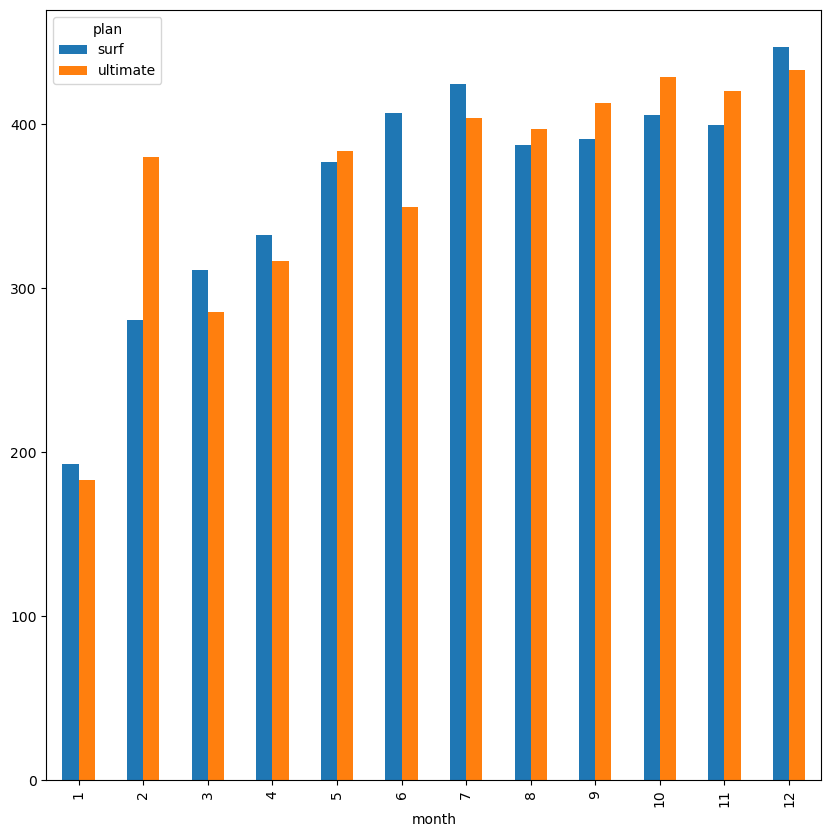

In [57]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
panggilan = df_gabungan_new.pivot_table(index='month',columns='plan',values='call_duration',aggfunc=['mean','sum'])
panggilan.plot(y='mean', kind='bar',figsize=(10,10))

array([[<Axes: title={'center': "('sum', 'surf')"}>,
        <Axes: title={'center': "('sum', 'ultimate')"}>]], dtype=object)

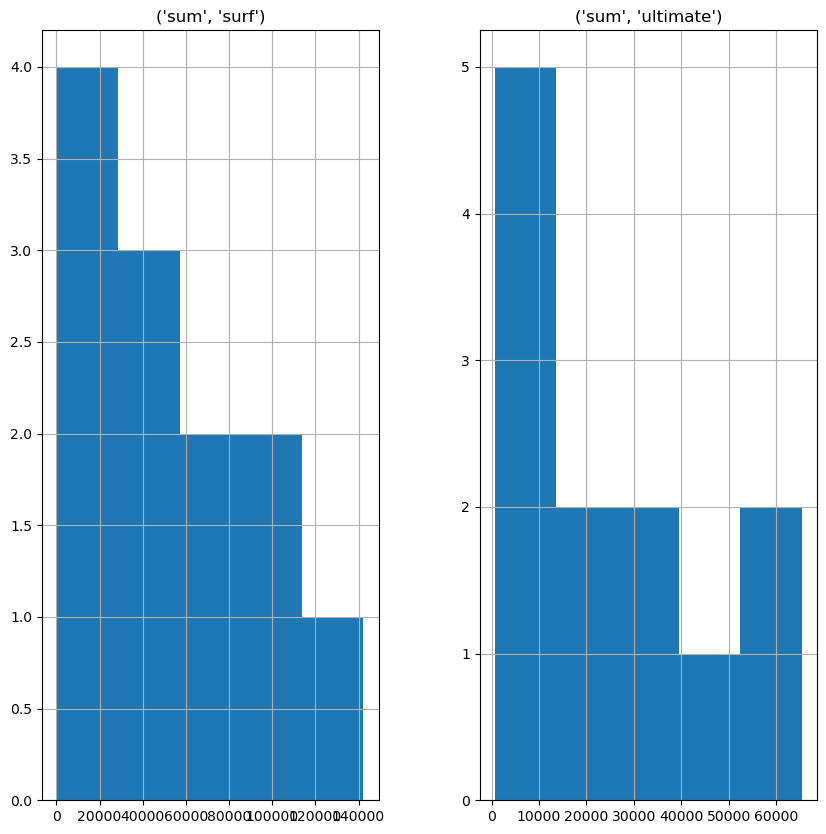

In [58]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
panggilan.hist('sum', bins=5,figsize=(10,10))

[Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula.]

In [59]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
mean_panggilan = panggilan['mean'].mean()
var_panggilan = panggilan['mean'].var()

In [60]:
mean_panggilan

plan
surf        363.062967
ultimate    366.312197
dtype: float64

In [61]:
var_panggilan

plan
surf        5177.321155
ultimate    5380.672843
dtype: float64

<Axes: >

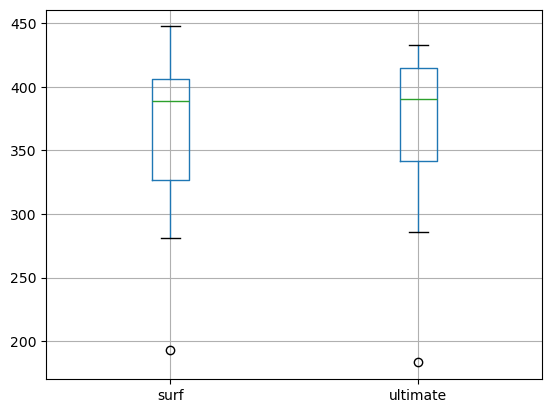

In [62]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
panggilan['mean'].boxplot()

Rata-rata kedua paket sama hampir sama, yang menandakan pengguna membeli paket bukan untuk melakukan panggilan.

### Pesan/SMS

<Axes: xlabel='month'>

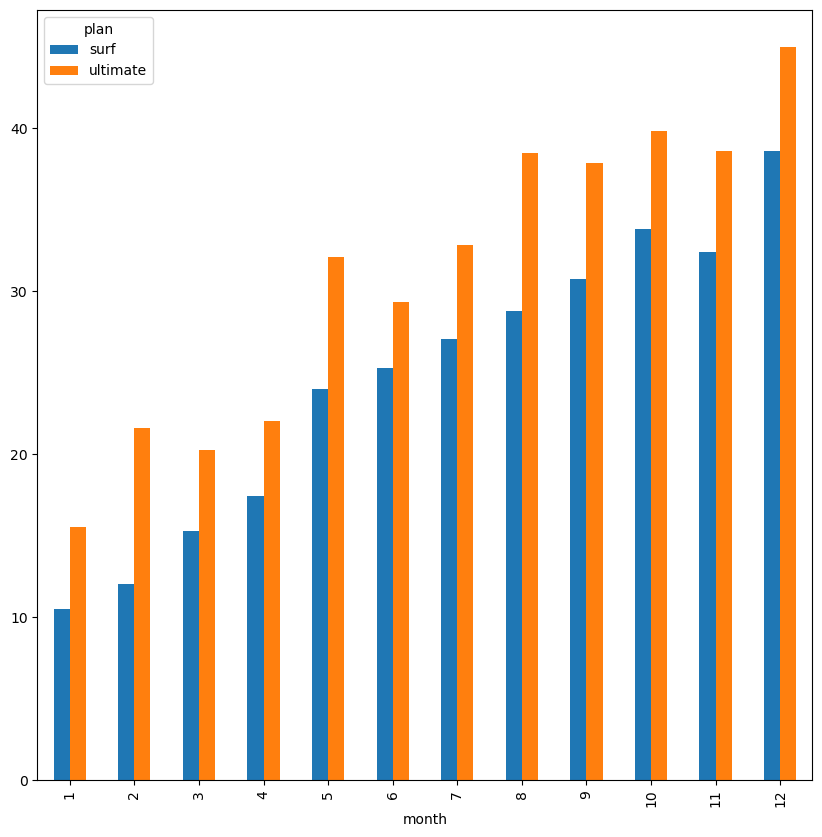

In [63]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
pesan =  df_gabungan_new.pivot_table(index='month',columns='plan',values='message_count',aggfunc=['mean','sum'])
pesan.plot(y='mean', kind='bar',figsize=(10,10))

array([[<Axes: title={'center': "('sum', 'surf')"}>,
        <Axes: title={'center': "('sum', 'ultimate')"}>]], dtype=object)

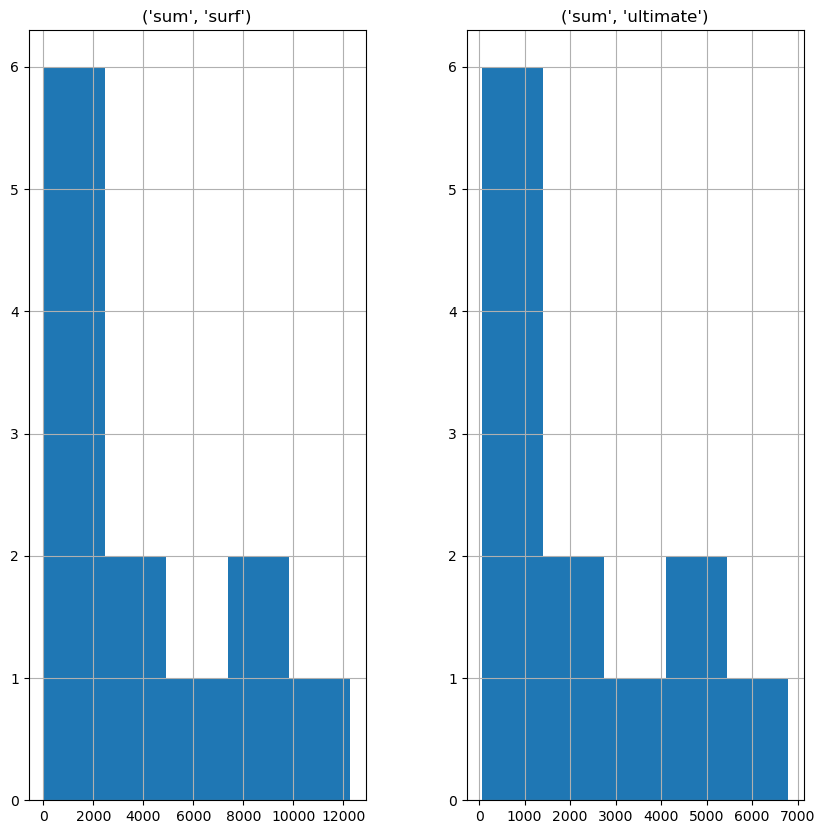

In [64]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
pesan.hist('sum', bins=5,figsize=(10,10))

In [65]:
mean_pesan = pesan['mean'].mean()
var_pesan = pesan['mean'].var()

In [66]:
mean_pesan

plan
surf        24.656000
ultimate    31.119214
dtype: float64

In [67]:
var_pesan

plan
surf        81.888846
ultimate    87.906203
dtype: float64

<Axes: >

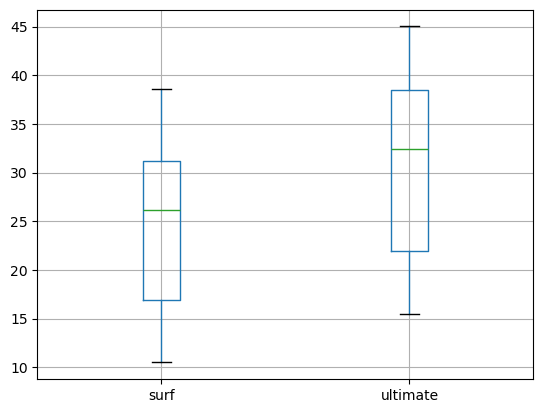

In [68]:
pesan['mean'].boxplot()

Penggunaan fitur pesan antara paket ultimate dengan surf tidak jauh berbeda, dan nilainnya juga dibawah penggunaan maksimum yang menyebabkan tidak banyak pengguna membayar lebih untuk mengirimkan pesan.

### Internet

<Axes: xlabel='month'>

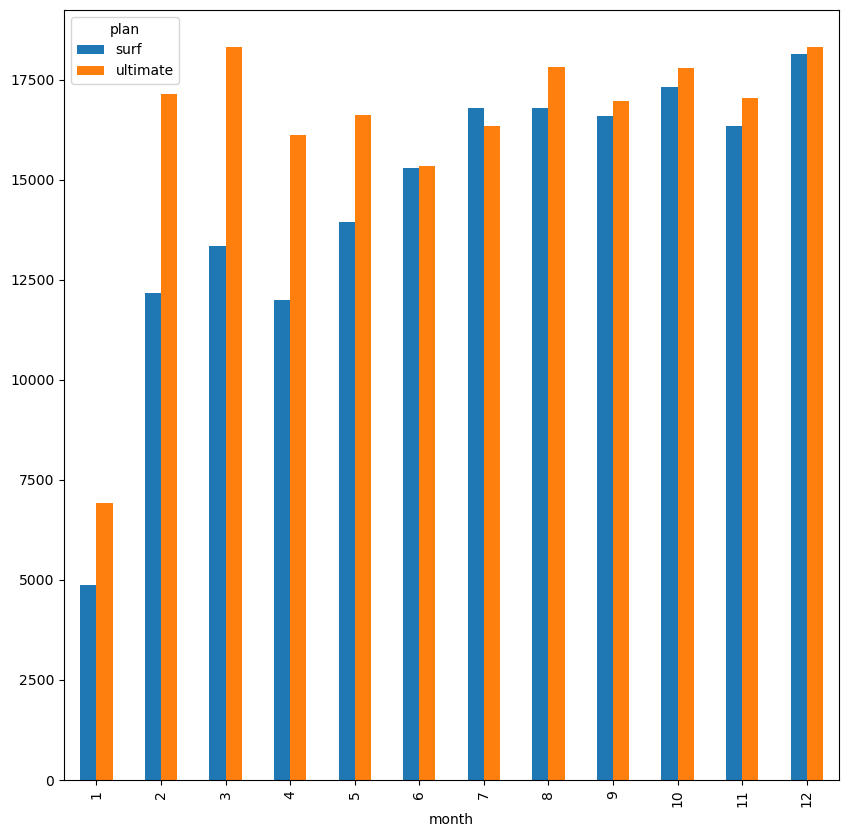

In [69]:
internet =  df_gabungan_new.pivot_table(index='month',columns='plan',values='mb_sum',aggfunc=['mean','sum'])
internet.plot(y='mean', kind='bar',figsize=(10,10))

array([[<Axes: title={'center': "('sum', 'surf')"}>,
        <Axes: title={'center': "('sum', 'ultimate')"}>]], dtype=object)

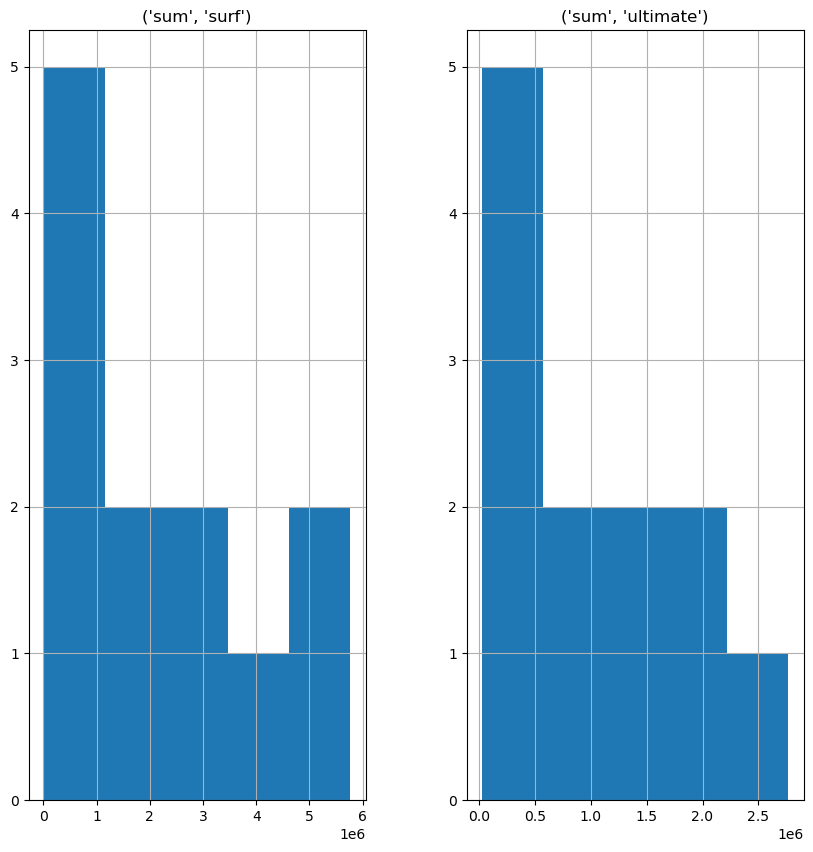

In [70]:
internet.hist('sum', bins=5,figsize=(10,10))

In [71]:
mean_internet = internet['mean'].mean()
var_internet = internet['mean'].var()

In [72]:
mean_internet

plan
surf        14464.554377
ultimate    16226.581745
dtype: float64

In [73]:
var_internet

plan
surf        1.327065e+07
ultimate    9.396330e+06
dtype: float64

<Axes: >

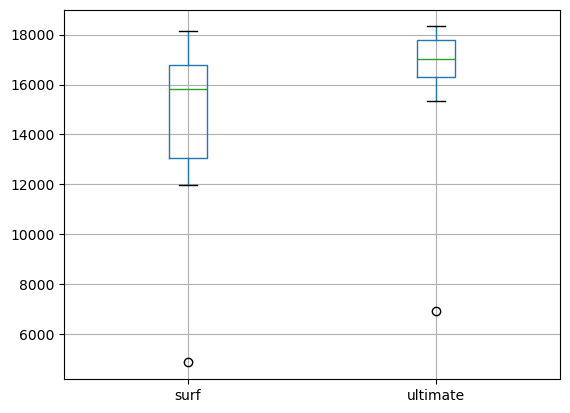

In [74]:
internet['mean'].boxplot()

Jika dibandingkan dari penggunaan, maka penggunaan internet pada paket ultimate jauh lebih banyak dibandingkan paket surf. Setelah itu, kesimpulan yang didapat pada boxplot menunjukkan bahwa pengguna lebih mementingkan internet daripada penggunaan telpon dan pesan gratis, hal ini juga didukukng bahwa penggunaan internet rata-rata mendekati penggunaan maksimum sebelum membayar lebih pada surf yang mana menunjukkan bahwa pengguna lebih mengutakamakan menghabiskan paket internet daripada telpon atau sms gratis. Namun, hal yang sama tidak dapat dikatakan untuk paket ultimate, dimana penggunaan internet masih jauh dari target pengguaan gratis yang telah ditetapkan.

## Pendapatan

<Axes: xlabel='month'>

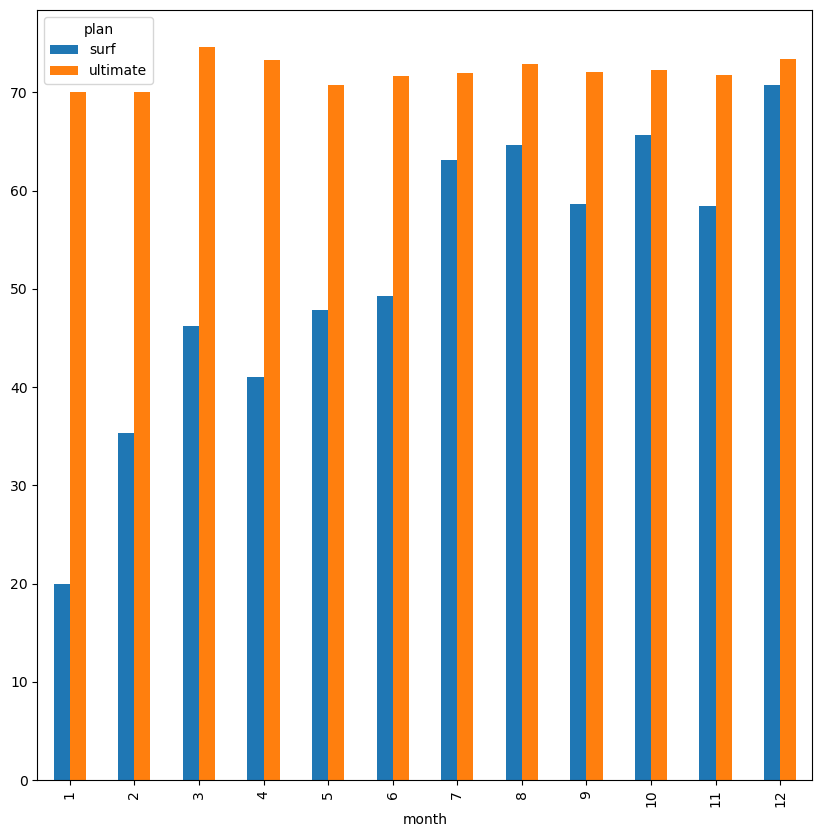

In [75]:
pendapatan =  df_gabungan_new.pivot_table(index='month',columns='plan',values='profit',aggfunc=['mean','sum'])
pendapatan.plot(y='mean', kind='bar',figsize=(10,10))

<Axes: xlabel='month'>

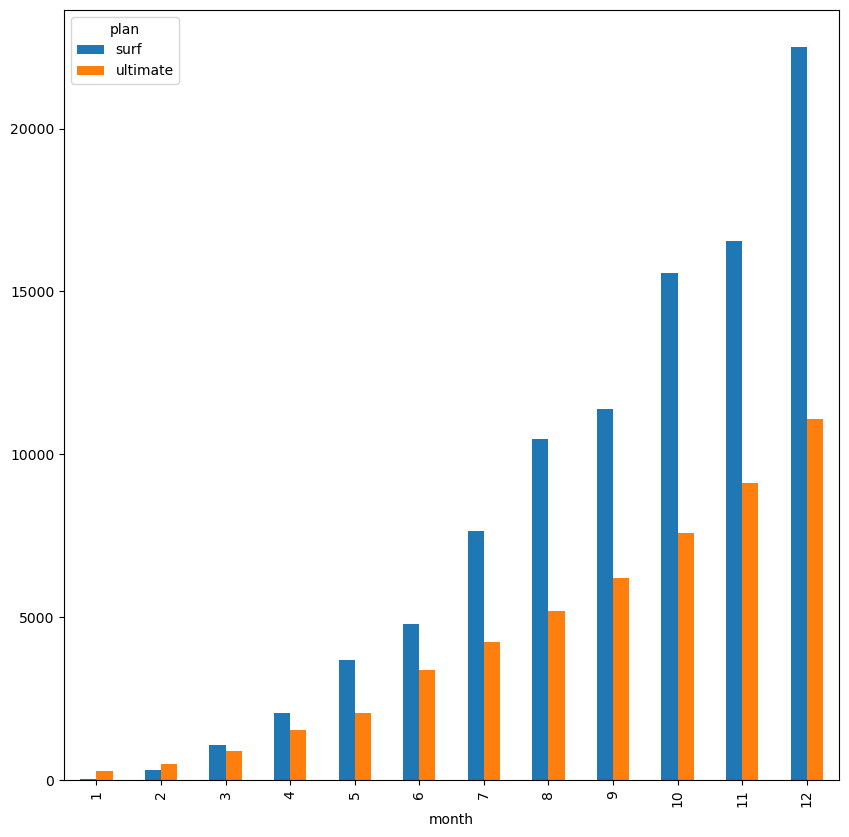

In [76]:
pendapatan.plot(y='sum',kind='bar',figsize=(10,10))

Pendapatan paket `surf` jauh lebih menguntungkan dibandingkan dengan paket `ultimate`

In [77]:
mean_pendapatan = pendapatan['mean'].mean()
var_pendapatan = pendapatan['mean'].var()

In [78]:
mean_pendapatan

plan
surf        51.759539
ultimate    72.071343
dtype: float64

In [79]:
var_pendapatan

plan
surf        216.945663
ultimate      1.956023
dtype: float64

<Axes: >

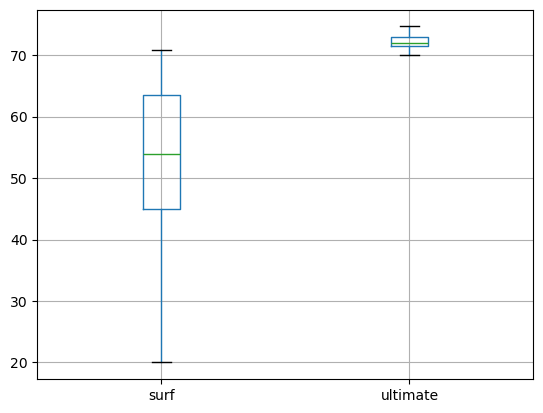

In [80]:
pendapatan['mean'].boxplot()

Didapat bahwa rata-rata dan median pendapatan dari paket ultimate jauh lebih besar dari paket surf. Namun juga didapat bahwa kebiasaan dari pengguna paket surf untuk membayar lebih besar dari paket yang disediakan. Berbeda dengan pengguna paket ultimate yang rata-rata tidak membayar lebih banyak.

## Menguji Hipotesis Statistik

**Pendapatan paket Surf dengan paket Ultimate**

Hipotesis nol disini menunjukkan bahwa pendapatan pada paket ultimate akan sama dengan pendapatan pada paket surf.

In [81]:
# Uji hipotesisnya
pendapatan_surf = pendapatan['mean']['surf']
pendapatan_surf

month
1     20.000000
2     35.371111
3     46.227391
4     41.058600
5     47.889481
6     49.244433
7     63.135372
8     64.626111
9     58.673969
10    65.641814
11    58.446184
12    70.800000
Name: surf, dtype: float64

In [82]:
pendapatan_ultimate = pendapatan['mean']['ultimate']
pendapatan_ultimate

month
1     70.000000
2     70.000000
3     74.666667
4     73.333333
5     70.724138
6     71.638298
7     72.016949
8     72.859155
9     72.034884
10    72.333333
11    71.818898
12    73.430464
Name: ultimate, dtype: float64

In [83]:
alpha = 0.05
results = st.ttest_ind(pendapatan_surf,pendapatan_ultimate, equal_var=False)
print('p-value:', results.pvalue)# kodemu: tampilkan nilai p yang kamu dapatkan)

if (results.pvalue < alpha):# kodemu: bandingkan nilai p yang kamu dapatkan dengan tingkat signifikansi:):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value: 0.0005655981166376988
Kita menolak hipotesis nol


Didapat bahwa pendapatan rata-rata dari pengguna paket prabayar surf dan ultimate berbeda. Rata-rata pendapatan paket ultimate lebih besar dari paket surf

**Pendapatan di NY-NJ dengan wilayah lain**

In [84]:
# Pengguna di wilayan NY-NJ
NY_NJ_total = df_gabungan_new.loc[(df_gabungan_new['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')].reset_index()
NY_NJ = NY_NJ_total['profit']
NY_NJ.describe()

count    376.000000
mean      60.169282
std       44.340250
min       20.000000
25%       20.000000
50%       52.520000
75%       76.070000
max      290.000000
Name: profit, dtype: float64

In [85]:
#Pengguna di wilayah lain
lokasi_total = df_gabungan_new.loc[(df_gabungan_new['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA')].reset_index()
lokasi = lokasi_total['profit']
lokasi.describe()

count    1916.000000
mean       65.481936
std        48.055811
min        20.000000
25%        23.870000
50%        70.000000
75%        70.000000
max       598.660000
Name: profit, dtype: float64

In [86]:
alpha = 0.05
results = st.ttest_ind(lokasi,NY_NJ, equal_var=False)
print('p-value:', results.pvalue)# kodemu: tampilkan nilai p yang kamu dapatkan)

if (results.pvalue < alpha):# kodemu: bandingkan nilai p yang kamu dapatkan dengan tingkat signifikansi:):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value: 0.03666934744017559
Kita menolak hipotesis nol


Didapat bahwa ternyata memang wilayah NY-NJ berbeda dari lokasi lainnya.

## Kesimpulan Umum


1. Ketika membaca file, digunakan `parse dates` untuk mempercepat membaca data dalam format `datetime`
2. Setelah itu dilakukan pengecekan untuk melihat apakah terdapat duplikat pada data yang ternyata data tidak memiliki duplikat sama sekali.
3. Pada tahap selanjutnya belum dihapus `outlier` pada data, mengingat bahwa data memiliki 2 paket prabayar yang bisa saja penghilangan `outlier` berdampak sangat besar pada hasil akhir analisis.
4. Untuk penggabungan data digunakan `merge` dengan metode penggabungan `outlier` agar tidak ada data `user` yang hilang dalam proses penggabungan yang mana setelah itu nilai `NaN` diganti dengan nilai `0` dengan asumsi bahwa `NaN` berarti pengguna tidak menggunakan paket gratis yang disediakan. 
5. Terakhir, dari semua analisa, didapat bahwa paket prabayar `surf` jauh lebih menguntungkan dibandingkan dengan paket `ultimate`.